# Titanic Survivors Analysis
**Yacine Haddad, January 2017**

![.](http://s2.quickmeme.com/img/56/566939e4d16f26f06f1b648b74270c264240bb66a4d778e53c3f85f84ab3976c.jpg)

This notebook is a gentle introduction to data analysis in python step-by-step. Starting from raw data to making prediction model on the Titanic Survivors dataset.

On this example, I will cover some basics on pandas, `numpy` array and data-visualisation.
I have based this example on few resources that are listed below:
* https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish
* https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic
* https://www.kaggle.com/jasonm/large-families-not-good-for-survival

We start first by setting the environment and loading the dataset from Kaggle website aka [https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic#tutorials). Then explore the data through various visualisation examples that will help us understand the dataset that we are analysing and shape new variables to be used in the predictive model. 

1. [Dive into data](#Dave into datal)
    1. [What story data tell us ?](## What story data tell us ?)
    1. [Building new features](## Building new features )
    1. [Dealing with missing data](## Dealing with missing data)
2. [Making predictive model](#Making predictive model)
    1. [What model to choose ?](## What model to choose ?)
    2. [Fine tune my model ](## Fine tune my model )
3. [Make submission](# Make submission)

## Dive into data

First things first! If you want to be a data scientist, then you need to get some data and dive in it. Kaggle is probably the place to find some data to play with an get started as an analyst. As I am using python, you need to import your exploration kit that will allow you to load, visualise and, most importantly, understand your data. For this tutorial, we ill import numpy and pandas for data manipulation, matplotlib and seaborn for data visualisation: 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-dark-palette')
%matplotlib inline

The Titanic challenge comes with a training and validation datasets. The first can be used to understand the content of the data and train a model to make a prediction, and then the second can be used to test the model that we will build. 

``Pandas`` has a built-in function to read and load CSV files and load the data directly into a ``Pandas`` dataframe.

In [11]:
# loading the dataset into pandas dataframes
data_train = pd.read_csv('../input/train.csv')
data_valid = pd.read_csv('../input/test.csv')

> Sometimes, if you can, you can open the data files diretly and look into the data. This will allow you to spot any requirement to read the data, for example in case where the columns are separated by `;` instead of `,`. You can also add columns names in there are not present in the datafile... etc


## What story data tell us ?
When get hands to data for the first time, it good to know the origin and the context of the data, any information that might come with data is can be useful to build your model. Kaggle page for this dataset (that you can find  [here](http://https://www.kaggle.com/c/titanic/data)), is quite illuminating:

| Variable        | Definition           | 
| ------------- |:-------------:| 
| survival    | Survival	0 = No, 1 = Yes | 
| pclass	  | Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd|
| sex	        | Sex	|
| Age 	      | Age in years	|
| sibsp	     | # of siblings / spouses aboard the Titanic	|
| parch	    | # of parents / children aboard the Titanic	|
| ticket 	| Ticket number	|
| fare	 |Passenger fare	|
| cabin	|Cabin number	|
| embarked|	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton|

Ah ha! Now, our data make more sens, isn't it ? It a good practice to see what the data contains, and `describe()` and `dead` are the best `pandas` functions to do that:

In [14]:
# return first 5 rows in the dataframe
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# print a dcription of the dataset
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the previous outputs,  we can tell the nature of the data. each row represent a passenger and the columns represent some characteristic that describe the passenger, such as the ticket fare, Age, Name... etc.  We also can tell that the dataset has some missing values, for example the column `Age` has only 714 rows instead of 891, which means that 177 values are missing.  In the column Cabin, we can see that may passenger, with no or unknown cabin. We will see later how to deal with missing data later, and for now let visualise our data. 

We wanna see, if the parity is respected during the disaster, and therefore can look to the fraction of females and males survived during the disaster.
> *Such investigation can be done in two ways, numerical or graphical. But you know probably that saying: A picture is worth a thousand words, so option 2 will be ;) *

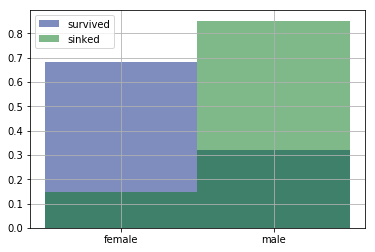

In [16]:
data_train.Sex[data_train.Survived==1].hist(bins=2,range=[-0.5,1.5], alpha=0.5, normed=1, label='survived')
data_train.Sex[data_train.Survived==0].hist(bins=2,range=[-0.5,1.5], alpha=0.5, normed=1, label='sinked')
plt.legend()
plt.show()

Wow! It is clear, in 2012, that rule of "children and **women** first" is well respected and this histogram is the proof. more than 65% of the females survived against roughly 30% of males. This is just an example of what a histogram can tell us. 
> *You can notice here that the historgrams are normalised. The reason is we want to have instead of a simple count, the survival rate for each sex.*

Now, let use Seaborn, a wonderful tool that allows us to make similar histograms, by combining 2 or 3 features, in only one line of code. For example, we want to see the survival rate by ticket class for male and females. This can be achieved by calling `barplots` as such:

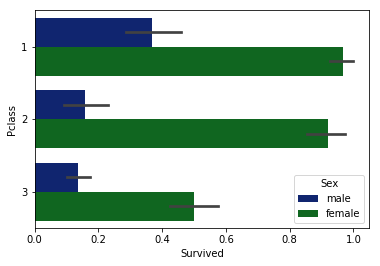

In [17]:
# how is the fraction of survivors in each class and each class
sns.barplot(y="Pclass", x="Survived", hue="Sex",orient='h', data=data_train)
plt.show()

The Titanic has collected passengers in 3 different ports. It departed from **Southampton (England)** and made two stops in **Cherbourg (France)** and **Queenstown (Irland)**. We want to see if the port of embarkment has something todo with the survival rate. We did then the same exercise as before, here we go:

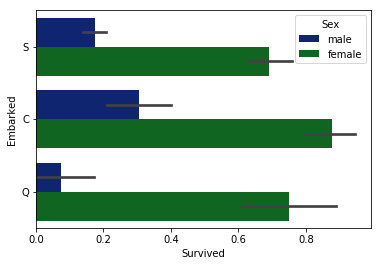

In [19]:
sns.barplot(y="Embarked", x="Survived", hue="Sex",orient='h', data=data_train)
plt.show()

Obviously, the survival rate seems unbalanced! it seems like the French passengers had more chances of survival. How is this possible? We will try to find out later what secret hides behind this observation.

We want to simplify the variable age to include ages tranches. We could then define a function that does that for us:

In [20]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df['Age_category'] = categories
    return df

data_train = simplify_ages(data_train)
data_valid = simplify_ages(data_valid)

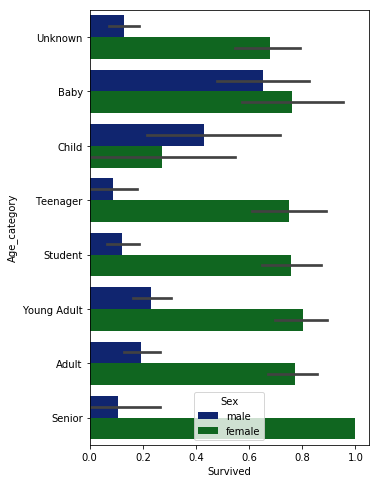

In [21]:
plt.figure(figsize=(5,8))
sns.barplot(x="Survived", y="Age_category", hue="Sex", orient='h', data=data_train)
plt.show()

Following the same logic, we can also extract information about the cabin, and fill missing data with a "None" variable. We could also extract the information about the title of the passenger, this could be helpful when we are going to building a prediction model.

In [22]:
import re
data_train['Title'] = data_train.Name.apply(lambda x: re.sub("(.*, )|(\\..*)", "", x))
data_train.groupby(['Title','Sex']).size()

Title         Sex   
Capt          male        1
Col           male        2
Don           male        1
Dr            female      1
              male        6
Jonkheer      male        1
Lady          female      1
Major         male        2
Master        male       40
Miss          female    182
Mlle          female      2
Mme           female      1
Mr            male      517
Mrs           female    125
Ms            female      1
Rev           male        6
Sir           male        1
the Countess  female      1
dtype: int64

For our curiosity, Let check some of the personalities on board, and learn some information about them. 
We can see that on this boat there was a woman with the title "the Countess", she is Noël Leslie, Countess of Rothes. Following Wikipedia [https://en.wikipedia.org/wiki/Noël_Leslie,_Countess_of_Rothes](https://en.wikipedia.org/wiki/Noël_Leslie,_Countess_of_Rothes) she was a heroine of the Titanic disaster:
> ... famous for taking the tiller of her lifeboat and later helping row the craft to the safety of the rescue ship Carpathia.


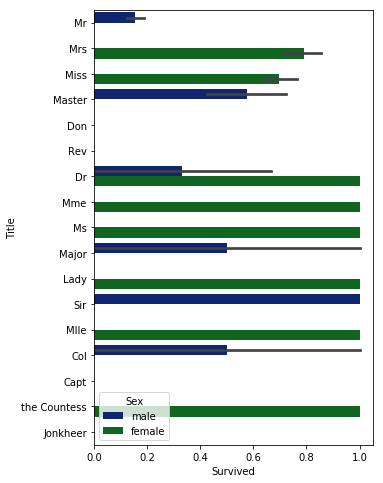

In [23]:
plt.figure(figsize=(5,8))
sns.barplot(y="Title", x="Survived", hue="Sex", orient='h', data=data_train)
plt.show()

In [24]:
def simplify_titles(df):
    df['Title'] = df.Name.apply(lambda x: re.sub("(.*, )|(\\..*)", "", x))
    df['Title'].value_counts()
    rare_title = np.array(['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'])

    # Also reassign mlle, ms, and mme accordingly
    df.iloc[df.Title.values == 'Mlle' ,df.columns.get_loc('Title')] = 'Miss' 
    df.iloc[df.Title.values == 'Ms'   ,df.columns.get_loc('Title')] = 'Miss'
    df.iloc[df.Title.values == 'Mme'  ,df.columns.get_loc('Title')] = 'Mrs' 
    df.iloc[df.Title.isin(rare_title).values ,df.columns.get_loc('Title')] = 'Rare Title'
    return df
data_train = simplify_titles(data_train)
data_valid = simplify_titles(data_valid)

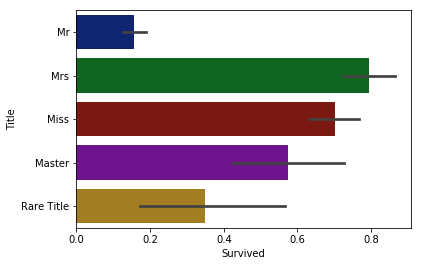

In [25]:
sns.barplot(y="Title", x="Survived", orient='h', data=data_train)
plt.show()

In [26]:
def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df['Fare_category'] = categories
    return df
    
def drop_features(df):
     return df.drop(['Ticket', 'Name'], axis=1)
    
    
def simplify_embarked(df):
    df.Embarked = df.Embarked.fillna('N')
    return df

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = simplify_titles(df)
    df = simplify_embarked(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_valid = transform_features(data_valid)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_category,Title,Fare_category
0,1,0,3,male,22.0,1,0,7.2500,N,S,Student,Mr,1_quartile
1,2,1,1,female,38.0,1,0,71.2833,C,C,Adult,Mrs,4_quartile
2,3,1,3,female,26.0,0,0,7.9250,N,S,Young Adult,Miss,1_quartile
3,4,1,1,female,35.0,1,0,53.1000,C,S,Young Adult,Mrs,4_quartile
4,5,0,3,male,35.0,0,0,8.0500,N,S,Young Adult,Mr,2_quartile


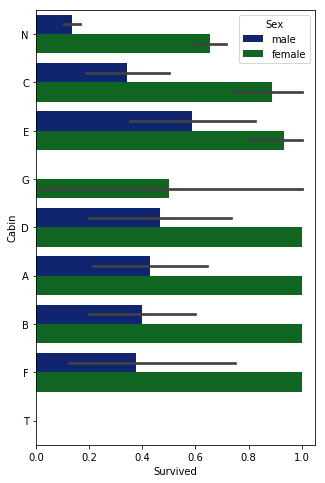

In [27]:
plt.figure(figsize=(5,8))
sns.barplot(y="Cabin", x="Survived", hue="Sex", orient='h', data=data_train)
plt.show()

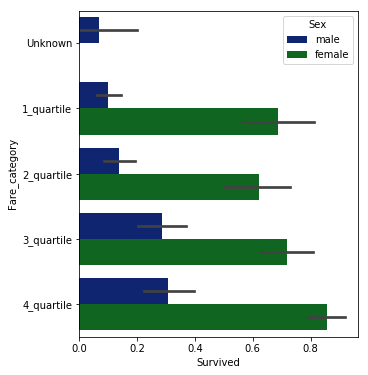

In [28]:
plt.figure(figsize=(5,6))
sns.barplot(y="Fare_category", x="Survived", hue="Sex",orient='h', data=data_train)
plt.show()

### Does a family size matters ?

In [29]:
data_train['Fsize'] = data_train.SibSp + data_train.Parch + 1
data_valid['Fsize'] = data_valid.SibSp + data_valid.Parch + 1

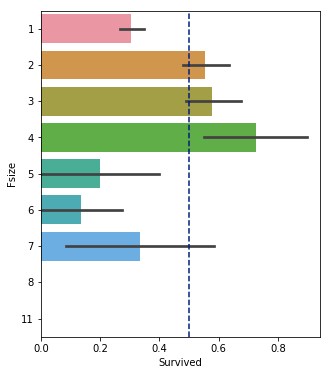

In [30]:
plt.figure(figsize=(5,6))
sns.barplot(y="Fsize", x="Survived",orient='h', data=data_train)
plt.axvline(0.5, ls='--')

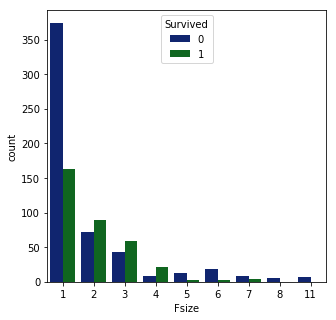

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(x="Fsize", hue="Survived", data=data_train)

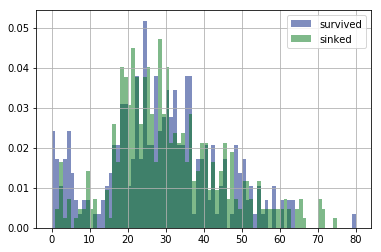

In [48]:
data_train.Age[data_train.Survived==1].hist(bins=80,range=[0,80], alpha=0.5, normed=1, label='survived')
data_train.Age[data_train.Survived==0].hist(bins=80,range=[0,80], alpha=0.5, normed=1, label='sinked')
plt.legend()
plt.show()

In [32]:
data_train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_category,Title,Fare_category,Fsize
0,1,0,3,male,22.0,1,0,7.2500,N,S,Student,Mr,1_quartile,2
1,2,1,1,female,38.0,1,0,71.2833,C,C,Adult,Mrs,4_quartile,2
2,3,1,3,female,26.0,0,0,7.9250,N,S,Young Adult,Miss,1_quartile,1


In [33]:
data_valid.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_category,Title,Fare_category,Fsize
0,892,3,male,34.5,0,0,7.8292,N,Q,Young Adult,Mr,1_quartile,1
1,893,3,female,47.0,1,0,7.0000,N,S,Adult,Mrs,1_quartile,2
2,894,2,male,62.0,0,0,9.6875,N,Q,Senior,Mr,2_quartile,1


## Making predictive model

In [34]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    str_features = [
        'Sex', 'Cabin', 'Embarked', 'Age_category', 'Title', 'Fare_category'
    ]
    df_combined = pd.concat([df_train[str_features], df_test[str_features]])
    
    for feature in str_features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_valid = encode_features(data_train, data_valid)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_category,Title,Fare_category,Fsize
0,1,0,3,1,22.0,1,0,7.2500,7,3,4,2,0,2
1,2,1,1,0,38.0,1,0,71.2833,2,0,0,3,3,2
2,3,1,3,0,26.0,0,0,7.9250,7,3,7,1,0,1
3,4,1,1,0,35.0,1,0,53.1000,2,3,7,3,3,2
4,5,0,3,1,35.0,0,0,8.0500,7,3,7,2,1,1


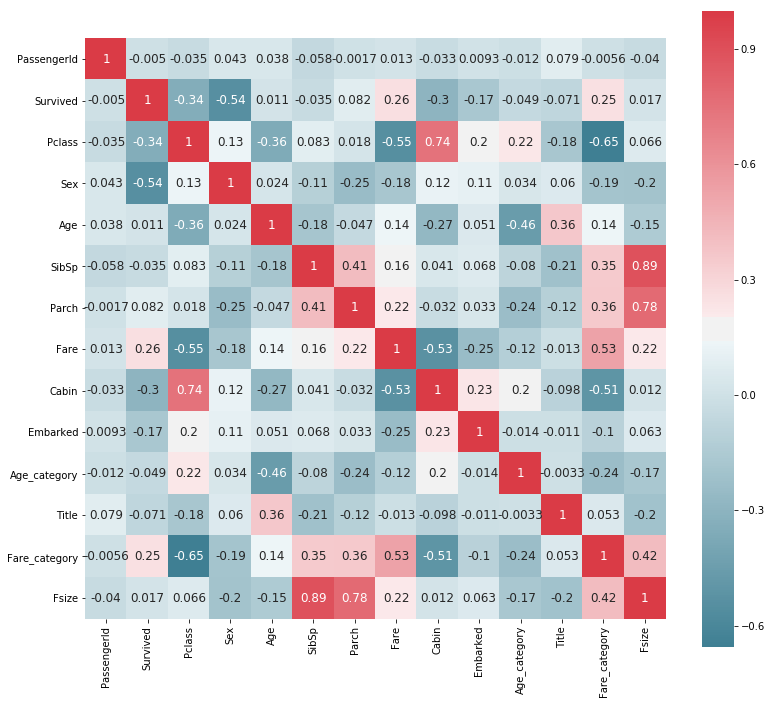

In [35]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 13 , 13 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

plot_correlation_map( data_train )

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.30
X_train, X_valid, y_train, y_valid = train_test_split(
    X_all, y_all, 
    test_size=num_test, 
    random_state=23
)

In [37]:
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_category,Title,Fare_category,Fsize
387,2,0,36.0,0,0,13.0000,7,3,0,1,1,1
603,3,1,44.0,0,0,8.0500,7,3,0,2,1,1
691,3,0,4.0,0,1,13.4167,7,0,1,1,1,2


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
clfs = {
    'LogisticRegression'         : LogisticRegression(),
    "RandomForestClassifier"     : RandomForestClassifier(),
    "GradientBoostingClassifier" : GradientBoostingClassifier()
}

In [40]:
for i, clf in clfs.items():
    clf.fit(X_train, y_train)

In [41]:
from sklearn.metrics import make_scorer, accuracy_score

In [42]:
from sklearn import cross_validation
for i, clf in clfs.items():
    cv_score = cross_validation.cross_val_score(clf,X_all,y_all, cv=5, scoring='accuracy')
    print("%30s CV Score : Mean - %.3g +\- %.4g (Min - %.3g, Max - %.3g)" % (
        i, np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)
    ))

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


            LogisticRegression CV Score : Mean - 0.786 +\- 0.01672 (Min - 0.764, Max - 0.808)
    GradientBoostingClassifier CV Score : Mean - 0.841 +\- 0.01686 (Min - 0.815, Max - 0.865)
        RandomForestClassifier CV Score : Mean - 0.81 +\- 0.01962 (Min - 0.781, Max - 0.837)


### Fine tune classifier parameters

In [43]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth'         : range(2,15,2), 
              'min_samples_split' : np.linspace(0.001,0.01,6),
              'min_samples_leaf'  : range(1,10,2),
              'subsample'         : [0.7,0.8,0.9],
             }

grid_obj = GridSearchCV(clfs['GradientBoostingClassifier'], 
                        parameters, 
                        cv=5, 
                        scoring='accuracy',
                        n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

cv_score = cross_validation.cross_val_score(grid_obj.best_estimator_, 
                                            X_all, y_all, cv=5, 
                                            scoring='accuracy')

print (grid_obj.best_params_)
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (
    np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)
))

{'min_samples_split': 0.001, 'subsample': 0.7, 'max_depth': 2, 'min_samples_leaf': 5}
CV Score : Mean - 0.8328 | Std - 0.01057 | Min - 0.8156 | Max - 0.8436


Run everything and go make yourself  a tea or a coffe, this might take a while. 
When the grid search finiches, it returns the parameters that gives better accuracy and for instance, for our case, the best parameters are :
```
{'max_depth': 2, 'min_samples_leaf': 7, 'min_samples_split': 0.01, 'subsample': 0.8}
```


## Make predictions and submission

In [44]:
submit = grid_obj.best_estimator_.predict(data_valid.drop(['PassengerId'], axis=1))

In [45]:
df = pd.DataFrame()
df['PassengerId'] = data_valid['PassengerId']
df['Survived'] = submit

In [46]:
df.to_csv('submission.csv',index=False)

In [47]:
df.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
